In [1]:
# Importing necessary modules

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#Importing the dataset to the python environment

data= pd.read_csv(r"C:\Users\vasanth\Desktop\DivePlane\data.csv")
data

# Viewing the sum of null values present in each column:

#print(data.isnull().sum())

# Viewing number of records for each doctor  present in the dataset as a list

#print(list(data['ID'].value_counts()))

,ID,yrmo,AdderallPatients,AdderallPayments,AntibioPatients,AntibioPayments,OpioidPatients,OpioidPayments
0,6vFQfkVIyHglLHjv,2015-01,NaN,NaN,4.0,2439.0,2.0,2.0
1,6vFQfkVIyHglLHjv,2015-02,1.0,114.0,1.0,5.0,NaN,NaN
2,6vFQfkVIyHglLHjv,2015-03,NaN,NaN,4.0,6396.0,NaN,NaN
3,6vFQfkVIyHglLHjv,2015-04,1.0,120.0,2.0,9.0,NaN,NaN
4,6vFQfkVIyHglLHjv,2015-05,NaN,NaN,26.0,16963.0,2.0,4.0
5,6vFQfkVIyHglLHjv,2015-06,14.0,1753.0,2.0,3603.0,NaN,NaN
6,1wyQjXUjUljiLEyP,2015-04,1.0,1500.0,5.0,72156.0,1.0,461.0
7,1wyQjXUjUljiLEyP,2015-05,1.0,8.0,8.0,5089.0,1.0,37.0
8,1wyQjXUjUljiLEyP,2015-06,NaN,NaN,5.0,40938.0,NaN,NaN
9,1wyQjXUjUljiLEyP,2015-07,7.0,151.0,3.0,292.0,2.0,24.0


filling payments columns NULLs with 0's only where the corresponding patients rows were NULLs in each correspoding category
of drug

This is because both patients and payments columns would be zeroes in the event a record has no patients and  
its not a missig value that needs imputation.

In [265]:


Payment_columns= ['AdderallPayments','AntibioPayments','OpioidPayments']

drug_columns= ['AdderallPatients','AntibioPatients','OpioidPatients']

def NullWithZero(data,Payment_columns,drug_columns):
    
    for i,j in zip(Payment_columns,drug_columns):
        
        data[i]=data.apply(lambda row:0 if np.isnan(row[j]) and np.isnan(row[i])
                          else row[i], axis=1)
        
# Executing the Null with Zero function for our dataset

NullWithZero(data,Payment_columns,drug_columns)

In [266]:
#filling out the null values of patients coluns with zeroes using dictionary

 

values = {'AdderallPatients': 0,'AntibioPatients': 0,'OpioidPatients': 0}

data.fillna(value=values,inplace=True)



# Now there are 3 records in Antiobiotic payments which are NULLs and the corresponding antibiotic patients row
# was neither null nor zero.

# So I imputed them with mean value.

def imputer(dataset,column):             # defining imputer function
    
    dataset[column].fillna((dataset[column].mean()),inplace=True)


imputer(dataset=data,column='AntibioPayments')       # calling the imputer function

In [267]:
# Viewing the descriptive statistics for the data:


data.describe() # there are some negative values present in each Payment column for each drug

data.query('AdderallPayments<0 or AntibioPayments<0 or OpioidPayments<0 ').shape[0] 

# there are 80 records which contain negatives


# Remvoing the 80 such rows which are negative as I do not want to assume a value for them and impute

# and moreover 80 rows are not that high in comparison to 42k rows, so we wont be losing much information and those 80 rows

# dont belong to a single ID but to multiple. So should not be a problem.

data.query('AdderallPayments>=0 and AntibioPayments>=0 and OpioidPayments>=0',inplace=True)      # pandas query object is fast !!

#Creatig a calculated column for each drug which could indirectly serve as the number of presecriptions per patient.

#This is being done because no data has been given for number of prescriptions and I assumed that a patient would pay more

#if he is prescribed more given that he follows his provider's advice.

In [268]:



NewColumns=['Pay/patient_Ad','Pay/patient_AntiB','Pay/patient_Opiod']     # Names of new columns in list



def CalculatedFields(dataset,NewColumns,Payment_columns,drug_columns):    # defining the function 
    
    for i,j,k in zip(NewColumns,Payment_columns,drug_columns):
        
        dataset[i]=dataset.apply(lambda row: (row[j]/row[k]) 
                                 
                                 if (row[k])!=0  else 0, axis=1)

        
        
CalculatedFields(data,NewColumns,Payment_columns,drug_columns)            # calling the function         

        

# But there is a problem, if there patient=0 then this calculated field would be undefined. So calculating for rows 

#containing non-zero patients and zeroes in zero patients cases.


In [269]:

# EXPLORATION OF CALCULATED FIELDS to find the threshold beyond which the prescriptions are considered beyond normal

# Or in other words Overprescriptions

listname=['List_adderral','List_Antibiotic','List_Opiod']

def list_generator(dataset,column,listname):
    
        empty_list=[]
        
        for i in dataset[column]:
            
            if i!=0:
                
                empty_list.append(i)
                
                listname=empty_list
                
        return listname

#generating lists using the function:

Adderrel_list=list_generator(data,column='Pay/patient_Ad',listname='List_adderral')

Antibiotic_list=list_generator(data,column='Pay/patient_AntiB',listname='List_Antibiotic')

Opioid_list=list_generator(data,column='Pay/patient_Opiod',listname='List_Opiod')

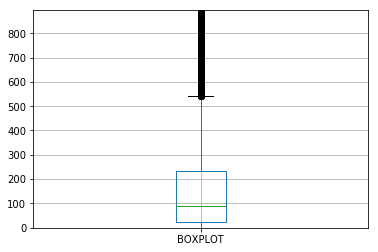

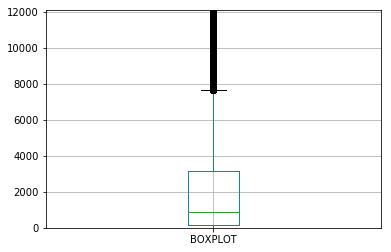

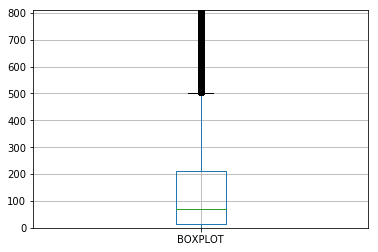

503.6625

In [270]:
#box plot for each

class BOX:
    
    def boxplot(input_list):
        
        df = pd.DataFrame({'BOXPLOT':input_list})
        
        y_lim=df['BOXPLOT'].quantile(0.95)
        
        box= plt.show(df.boxplot().set_ylim(0,y_lim))
        
    def threshold(input_list):
        
        df = pd.DataFrame({'BOXPLOT':input_list})
        
        threshold_value= (df['BOXPLOT'].quantile(0.75))+1.5*((df['BOXPLOT'].quantile(0.75))-df['BOXPLOT'].quantile(0.25))
        
        return threshold_value

    
#excuting boxplots and the threshold values to represent for oversprescription

# Adderral:

BOX.boxplot(Adderrel_list)

BOX.threshold(Adderrel_list)

# Antibiotics
BOX.boxplot(Antibiotic_list)

BOX.threshold(Antibiotic_list)

# Opioids:

BOX.boxplot(Opioid_list)

BOX.threshold(Opioid_list)
    


In [279]:
#Creating 3 additional indicator variables 1 in each category of drug:

# its a binary valued which is valued at 1 if the Pay/Patient>= typical prescription value in each category of drug and 0 else.

def indicator_variable(dataset,input_column,output_column_name,input_list):
    
    dataset[output_column_name]=dataset.apply(lambda row: 1 
                                            if (row[input_column]) >=(BOX.threshold(input_list))
                                   else 0,
    axis=1)

    
    # Executing the function to add 3 variables:

# This code takes a very long time to run. I guess the reason is because of the
# presence of class called to calculate threshold. I wanted this code to be used for future use by someone
# So, I let the code be.

indicator_variable(data,'Pay/patient_Ad','Overprescr_Adderral',Adderrel_list)

indicator_variable(data,'Pay/patient_AntiB','Overprescr_Antibiotic',Antibiotic_list)

indicator_variable(data,'Pay/patient_Opiod','Overprescr_Opioids',Opioid_list)

In [280]:
DOC_counts = data['ID'].value_counts().rename('DOC_counts')

DOC_data=data.merge(DOC_counts.to_frame(),
                                left_on='ID',
                                right_index=True)

# Taking only thos providers who have atleast 10 cases present in the dataset. 

DOC_data10=DOC_data[DOC_data.DOC_counts >= 10]

DOC_data=DOC_data10


In [284]:
# Adderral:

#Subsetting dataset for each drug

DOC_data_Adderral=DOC_data[['ID','AdderallPatients','AdderallPayments','Pay/patient_Ad','Overprescr_Adderral','DOC_counts']]

#Eliminating the Zero prescription records which dont add many meaning.

DOC_data_Adderral_non_zero=DOC_data_Adderral[DOC_data_Adderral['Pay/patient_Ad']!=0]

# Aggregrating over the providers and also computing columns such as sum of all oversprescribed cases,

#count of all the non-zero prescription records.

Adderral_Agg=DOC_data_Adderral_non_zero.groupby(['ID'],as_index=False).agg({'Overprescr_Adderral':sum,                  
                                     'Pay/patient_Ad': 'count'}) 

#Calculating a new column which says the percentage of overprescribed cases that the provider had when compared to 

#non-zero prescription cases he had

Adderral_Agg['Overprescription %']=(Adderral_Agg['Overprescr_Adderral']/Adderral_Agg['Pay/patient_Ad'])*100

# Renaming the columns, since groupby in python 3.6 wont allow renaming within groupby function like python 2.7

Adderral_Agg.columns=['ID','NUm_Overprescriptions','Num_Non_zero_prescr','Overspres%']

# I want that minimum no of non-zero prescriptions to be 10 or more

# I wanted to have good number of non-zero prescription cases to go into the calculation of overprescription.

Adderral_Agg10=Adderral_Agg[Adderral_Agg.Num_Non_zero_prescr >= 10]

# order by Overprescription rate

Adderral_Agg10.sort_values('Overspres%',ascending=False)

,ID,NUm_Overprescriptions,Num_Non_zero_prescr,Overspres%
830,WiUGAznSeq6eNc6n,17,17,100.000000
778,UY8bW4koFtgJI8J7,10,13,76.923077
743,SeuqJ68YTc1wrRjC,15,21,71.428571
542,KtIQV9FihhozcS4O,13,20,65.000000
881,YvXc9PhW83aoHti9,13,24,54.166667
971,cPetLZCRwAdgolBK,7,18,38.888889
1507,z8VGA1WkmwDXRUQy,5,13,38.461538
1447,wyQhxnSuKeC9kxLR,5,13,38.461538
918,aOIsngFBbrAO5MPM,6,16,37.500000
361,Db6KGC4Kd9uBVjnY,4,11,36.363636


In [285]:
# Antibiotics:

DOC_data_Antibiotic=DOC_data[['ID','AntibioPatients','AntibioPayments','Pay/patient_AntiB','Overprescr_Antibiotic','DOC_counts']]

DOC_data_Antibiotic_non_zero=DOC_data_Antibiotic[DOC_data_Antibiotic['Pay/patient_AntiB']!=0]

Antibiotic_Agg=DOC_data_Antibiotic_non_zero.groupby(['ID'],as_index=False).agg({'Overprescr_Antibiotic':sum,                  
                                     'Pay/patient_AntiB': 'count'}) 

Antibiotic_Agg['Overprescription %']=(Antibiotic_Agg['Overprescr_Antibiotic']/Antibiotic_Agg['Pay/patient_AntiB'])*100

Antibiotic_Agg.columns=['ID','NUm_Overprescriptions','Num_Non_zero_prescr','Overspres%']

# I want that minimum no of non-zero prescriptions to be >10

Antibiotic_Agg10=Antibiotic_Agg[Antibiotic_Agg.Num_Non_zero_prescr >= 10]

Antibiotic_Agg10.sort_values('Overspres%',ascending=False)

,ID,NUm_Overprescriptions,Num_Non_zero_prescr,Overspres%
1269,q07tNm5Q05un7PVi,6,16,37.500000
743,SeuqJ68YTc1wrRjC,7,20,35.000000
304,BB60OwZZzPOIavCZ,5,15,33.333333
658,PeSl8V19yo5TOewW,5,15,33.333333
244,8ywvdtouV50RTPPz,6,19,31.578947
1436,wIrQiTwYLjQkpC3H,5,16,31.250000
162,5lzdA7chGdS6jlLL,5,16,31.250000
1401,v7KtG58pmyx0qZ7z,9,29,31.034483
728,S7pEEzCYwT7kfqTZ,4,13,30.769231
1279,qR3RV8aOdBa7PVwt,4,13,30.769231


In [286]:
# Opioid:

DOC_data_Opiod=DOC_data[['ID','OpioidPatients','OpioidPayments','Pay/patient_Opiod','Overprescr_Opioids','DOC_counts']]

DOC_data_Opiod_non_zero=DOC_data_Opiod[DOC_data_Opiod['Pay/patient_Opiod']!=0]

Opiod_Agg=DOC_data_Opiod_non_zero.groupby(['ID'],as_index=False).agg({'Overprescr_Opioids':sum,                  
                                     'Pay/patient_Opiod': 'count'}) 

Opiod_Agg['Overprescription %']=(Opiod_Agg['Overprescr_Opioids']/Opiod_Agg['Pay/patient_Opiod'])*100

Opiod_Agg.columns=['ID','NUm_Overprescriptions','Num_Non_zero_prescr','Overspres%']

# I want that minimum no of non-zero prescriptions to be >10

Opiod_Agg10=Opiod_Agg[Opiod_Agg.Num_Non_zero_prescr >= 10]

Opiod_Agg10.sort_values('Overspres%',ascending=False)

,ID,NUm_Overprescriptions,Num_Non_zero_prescr,Overspres%
875,YvXc9PhW83aoHti9,11,11,100.000000
824,WiUGAznSeq6eNc6n,13,14,92.857143
1440,wwyJwO6CL1dqIooh,9,13,69.230769
605,NzImtgaLDt1ccCMt,3,10,30.000000
1020,fUlpUW7H8fK6avG5,3,10,30.000000
1066,hE4v2C0x72xnt5cA,3,10,30.000000
233,8aPy7XOU4RMnjo8m,3,11,27.272727
1012,f2b6w6vNUlotgg4z,3,12,25.000000
1081,hi1v1zqOYQnA6S67,3,12,25.000000
1139,kTtljCQTka0XjdeS,3,12,25.000000


In [287]:
# Assuming that 30% is the minimum no of times a doctor has to overprescribe over which the doctor is said to be likely to
# overprescribe.

Adderral_Agg_likely=Adderral_Agg10[Adderral_Agg10['Overspres%'] >= 30]


Adderral_Agg_likely.sort_values('Overspres%',ascending=False)

# passing the provider's column to a list for each drug.

Adderral_overpres_Doctor_list = Adderral_Agg_likely["ID"].tolist()

#displaying the content of that list or displaying the providers.

Adderral_overpres_Doctor_list

['DGb6BV1GCgl9BBjg',
 'Db6KGC4Kd9uBVjnY',
 'FGrxEXObjALsoEqg',
 'KtIQV9FihhozcS4O',
 'MvOFoQwAqAJ2IOcn',
 'Q45X1kFMnL8n3Vw3',
 'RdX4OAmxNYwzh1S7',
 'SeuqJ68YTc1wrRjC',
 'T0XCZbA7rEGvhKFi',
 'UY8bW4koFtgJI8J7',
 'WiUGAznSeq6eNc6n',
 'YvXc9PhW83aoHti9',
 'aOIsngFBbrAO5MPM',
 'azXdkxORxbkUXDV0',
 'cPetLZCRwAdgolBK',
 'fjoRLMRg47Cue0Ju',
 'hyaReUkJXVZE7FyU',
 'hzOJdEAmYOBeyiHy',
 'wyQhxnSuKeC9kxLR',
 'z8VGA1WkmwDXRUQy']

In [288]:
# Assuming that 30% is the minimum no of times a doctor has to overprescribe over which the doctor is said to be likely to
# overprescribe.

Antibiotic_Agg_likely=Antibiotic_Agg10[Antibiotic_Agg10['Overspres%'] >= 30]

Antibiotic_Agg_likely.sort_values('Overspres%',ascending=False)

Antibiotic_overpres_Doctor_list = Antibiotic_Agg_likely["ID"].tolist()

Antibiotic_overpres_Doctor_list

['5lzdA7chGdS6jlLL',
 '8ywvdtouV50RTPPz',
 'BB60OwZZzPOIavCZ',
 'GImiIyc8dp4IRdAo',
 'PeSl8V19yo5TOewW',
 'S7pEEzCYwT7kfqTZ',
 'SeuqJ68YTc1wrRjC',
 'Vo7ZfTiA1pAlwa7P',
 'c4GAexcFAZCIUFpW',
 'gYRHLCBnCFQxz46b',
 'iHbDjKUtbQWSvmAM',
 'q07tNm5Q05un7PVi',
 'qR3RV8aOdBa7PVwt',
 'ttpCmzcpw0OY8tWG',
 'v7KtG58pmyx0qZ7z',
 'wIrQiTwYLjQkpC3H']

In [289]:
# Assuming that 30% is the minimum no of times a doctor has to overprescribe over which the doctor is said to be likely to
# overprescribe.

Opiod_Agg_likely=Opiod_Agg10[Opiod_Agg10['Overspres%'] >= 30]

Opiod_Agg_likely.sort_values('Overspres%',ascending=False)

Opiod_overpres_Doctor_list = Opiod_Agg_likely["ID"].tolist()

Opiod_overpres_Doctor_list

['NzImtgaLDt1ccCMt',
 'WiUGAznSeq6eNc6n',
 'YvXc9PhW83aoHti9',
 'fUlpUW7H8fK6avG5',
 'hE4v2C0x72xnt5cA',
 'wwyJwO6CL1dqIooh']

In [290]:
##### categorising the behaviours of the doctors:

def IntersecOfSets_3(arr1, arr2, arr3):
    # Converting the arrays into sets
    s1 = set(arr1)
    s2 = set(arr2)
    s3 = set(arr3)
     
    # Calculates intersection of 
    # sets on s1 and s2
    set1 = s1.intersection(s2)      
     
    # Calculates intersection of sets
    # on set1 and s3
    result_set = set1.intersection(s3)
     
    # Converts resulting set to list
    final_list = list(result_set)
    
    print("The following are providers who would overprescribe all 3 drugs regardless:")
    
    print(final_list)


    # This list would contain the unique list of all doctors who have oversprescribed all the 3 drugs which that 
    
    #they tend to overprescribe every drug to their patients
    
IntersecOfSets_3(Adderral_overpres_Doctor_list,Antibiotic_overpres_Doctor_list,Opiod_overpres_Doctor_list)

The following are providers who would overprescribe all 3 drugs regardless:
[]


In [291]:
def IntersecOfSets_2(arr1, arr2):
    # Converting the arrays into sets
    s1 = set(arr1)
    s2 = set(arr2)
     
    # Calculates intersection of 
    # sets on s1 and s2
    result_set = s1.intersection(s2)      
      
    # Converts resulting set to list
    final_list = list(result_set)
    
    if arr1==Adderral_overpres_Doctor_list and arr2==Antibiotic_overpres_Doctor_list:
        print("The following are providers who would overprescribe both Adderrel and Antibiotics possibly for monetory gain:")
        print(final_list)
        
    if arr1==Adderral_overpres_Doctor_list and arr2==Opiod_overpres_Doctor_list:
        print("The following are providers who would overprescribe both Adderrel and Opiod possibly for monetory gain:")
        print(final_list)
        
    else:
        print("The following are providers who would overprescribe both Antiobiotics and Opiod possibly for monetory gain:")
        print(final_list)
    

In [292]:
IntersecOfSets_2(Antibiotic_overpres_Doctor_list,Opiod_overpres_Doctor_list)

The following are providers who would overprescribe both Antiobiotics and Opiod possibly for monetory gain:
[]


In [293]:
IntersecOfSets_2(Adderral_overpres_Doctor_list,Opiod_overpres_Doctor_list)

The following are providers who would overprescribe both Adderrel and Opiod possibly for monetory gain:
['WiUGAznSeq6eNc6n', 'YvXc9PhW83aoHti9']


In [294]:
IntersecOfSets_2(Adderral_overpres_Doctor_list,Antibiotic_overpres_Doctor_list)

The following are providers who would overprescribe both Adderrel and Antibiotics possibly for monetory gain:
['SeuqJ68YTc1wrRjC']
The following are providers who would overprescribe both Antiobiotics and Opiod possibly for monetory gain:
['SeuqJ68YTc1wrRjC']


In [295]:
def Union(lst1, lst2,lst3):
    
    final_list = list(set(list(set(lst1) | set(lst2) | set(lst3))))
    
    print("The following doctors have overprescribed at least one of the 3 drugs for either Monetory gain  ")
    
    return final_list




I think so the following list of doctors overprescribe for some other reason different than their habit to 

oversprescribe every drug.

Since no other columns other than Payments was given, I suppose that motivation for the oversprescription is monetory 

gain.

In [296]:
Union(Adderral_overpres_Doctor_list,Antibiotic_overpres_Doctor_list,Opiod_overpres_Doctor_list)

The following doctors have overprescribed at least one of the 3 drugs for either Monetory gain  


['MvOFoQwAqAJ2IOcn',
 'q07tNm5Q05un7PVi',
 'c4GAexcFAZCIUFpW',
 'hE4v2C0x72xnt5cA',
 'z8VGA1WkmwDXRUQy',
 '5lzdA7chGdS6jlLL',
 'gYRHLCBnCFQxz46b',
 'YvXc9PhW83aoHti9',
 'hyaReUkJXVZE7FyU',
 'GImiIyc8dp4IRdAo',
 'WiUGAznSeq6eNc6n',
 'KtIQV9FihhozcS4O',
 'wIrQiTwYLjQkpC3H',
 'PeSl8V19yo5TOewW',
 'wyQhxnSuKeC9kxLR',
 'SeuqJ68YTc1wrRjC',
 'Q45X1kFMnL8n3Vw3',
 'DGb6BV1GCgl9BBjg',
 'fjoRLMRg47Cue0Ju',
 'cPetLZCRwAdgolBK',
 'azXdkxORxbkUXDV0',
 '8ywvdtouV50RTPPz',
 'Db6KGC4Kd9uBVjnY',
 'hzOJdEAmYOBeyiHy',
 'iHbDjKUtbQWSvmAM',
 'UY8bW4koFtgJI8J7',
 'ttpCmzcpw0OY8tWG',
 'v7KtG58pmyx0qZ7z',
 'BB60OwZZzPOIavCZ',
 'fUlpUW7H8fK6avG5',
 'wwyJwO6CL1dqIooh',
 'FGrxEXObjALsoEqg',
 'T0XCZbA7rEGvhKFi',
 'NzImtgaLDt1ccCMt',
 'RdX4OAmxNYwzh1S7',
 'Vo7ZfTiA1pAlwa7P',
 'S7pEEzCYwT7kfqTZ',
 'qR3RV8aOdBa7PVwt',
 'aOIsngFBbrAO5MPM']

Apart from the In depth data exploration done above, I thought about the Clustering technique 

but the basic assumptions I made in the data like minimum number of doctor or provider cases to be 10 and 

minimum % of oversprescription cases to be above 30% and others resulted in smaller and smaller records.

CLustering technique could have been applied but then the records which go into Clustering would not  qualify towards the

assumptions made in the data during the Exploration stage. 



